# Laboratorio: Mejorando el Análisis de Sentimientos con LSTM y Características Adicionales

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

## Carga de datos

In [13]:
print('Cargando los datos...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=50000)

Cargando los datos...


## Pre-procesamiento

In [14]:
X_train = sequence.pad_sequences(X_train, maxlen = 80)
X_test = sequence.pad_sequences(X_test, maxlen = 80)

## Modelo

In [36]:
modelo = Sequential()
modelo.add(Embedding(50000, 128))
modelo.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Dropout, en la capa de entrada. Recurrent_dropout, en las capas recurrentes
modelo.add(Dense(1, activation='sigmoid'))

In [37]:
modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'precision', 'recall'])

## Entrenamiento y evaluación

In [38]:
# Agregar detención temprana para monitorear el entrenamiento
detencion_temprana = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    verbose = 1
)

In [39]:
historia_base = modelo.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
    verbose = 1,
    validation_data = (X_test, y_test),
    callbacks = [detencion_temprana]
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 366ms/step - accuracy: 0.7154 - loss: 0.5348 - precision: 0.7173 - recall: 0.7127 - val_accuracy: 0.8344 - val_loss: 0.3764 - val_precision: 0.8340 - val_recall: 0.8349
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 357ms/step - accuracy: 0.8947 - loss: 0.2763 - precision: 0.8966 - recall: 0.8946 - val_accuracy: 0.8331 - val_loss: 0.3961 - val_precision: 0.8162 - val_recall: 0.8599
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 327ms/step - accuracy: 0.9363 - loss: 0.1744 - precision: 0.9364 - recall: 0.9354 - val_accuracy: 0.8048 - val_loss: 0.5467 - val_precision: 0.8917 - val_recall: 0.6939
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 129s 329ms/step - accuracy: 0.9599 - loss: 0.1143 - precision: 0.9607 - recall: 0.9591 - val_accuracy: 0.8215 - val_loss: 0.4872 - val_precision: 0.8256 - val_recall: 0.8153
Epoch 4: early stopping


In [43]:
# Después del entrenamiento se puede revisar el historial
print(historia_base.history.keys())

perdida, exactitud, precision, recall = modelo.evaluate(X_test, y_test,
                            batch_size = 64,
                            verbose = 2)
print('Pérdida de la Prueba:', perdida)
print('Exactitud de la Prueba (Test accuracy):', exactitud)

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])
391/391 - 18s - 46ms/step - accuracy: 0.8215 - loss: 0.4872 - precision: 0.8256 - recall: 0.8153
Pérdida de la Prueba: 0.48724254965782166
Exactitud de la Prueba (Test accuracy): 0.8215199708938599


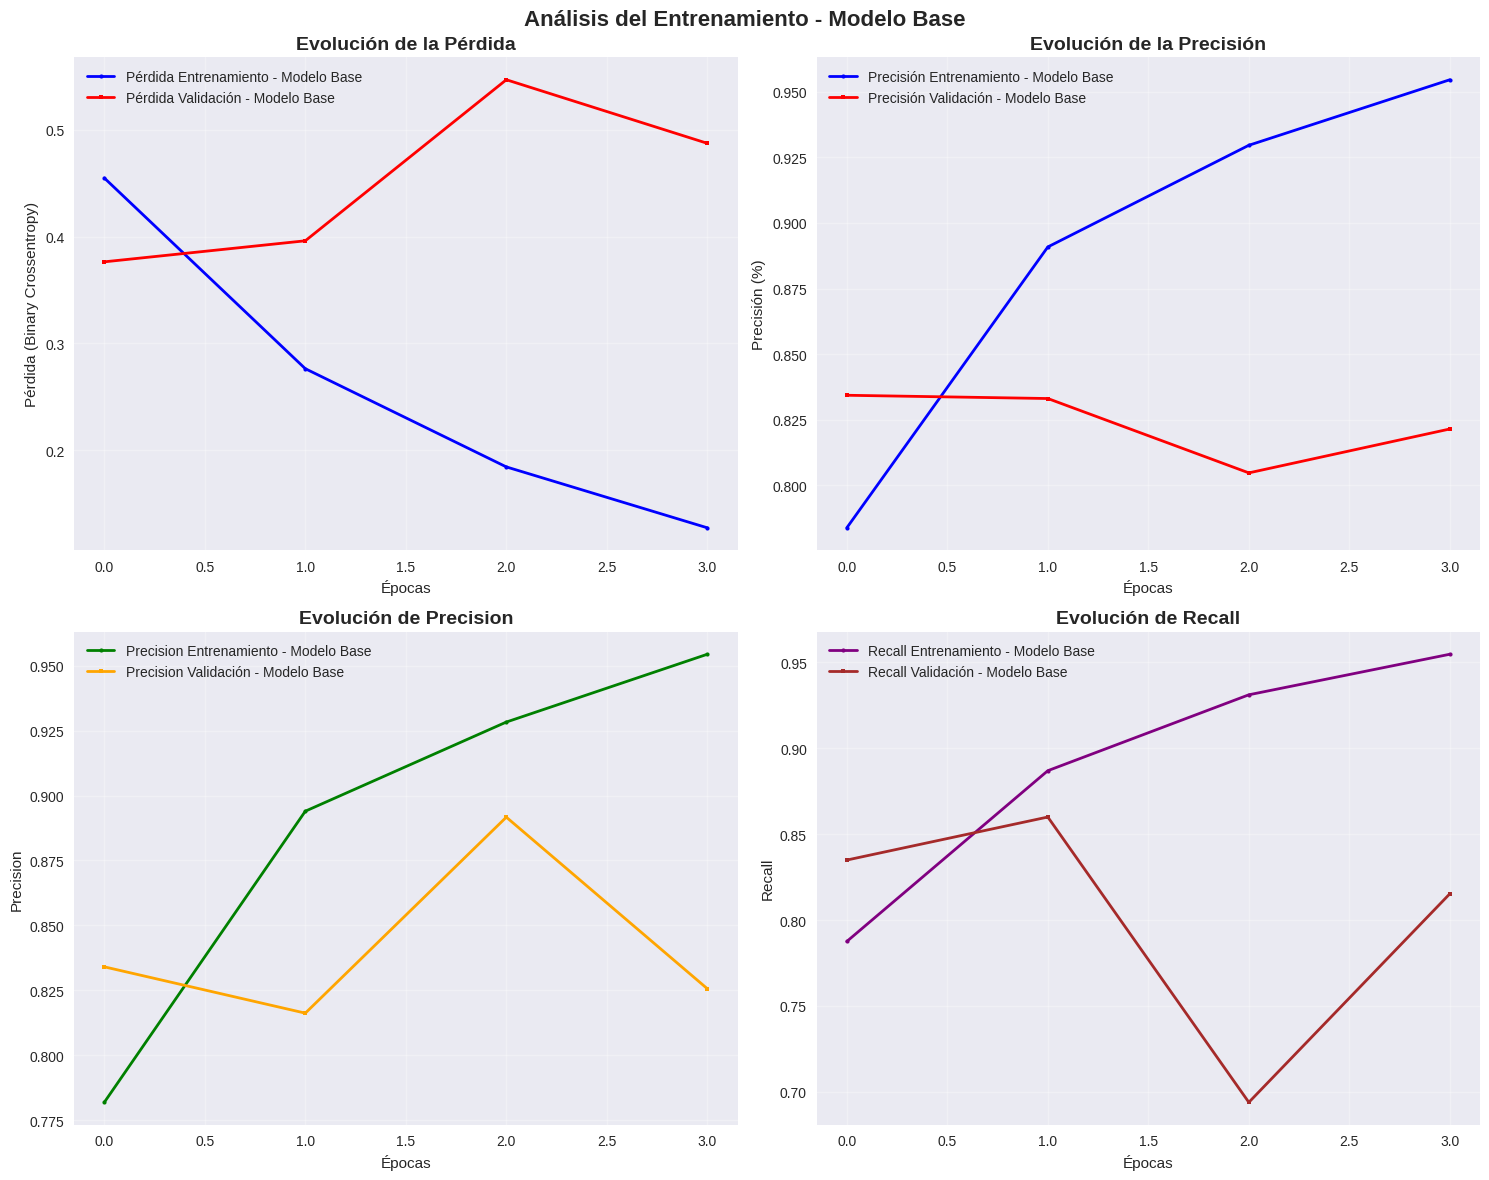

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del Entrenamiento - Modelo Base', fontsize=16, fontweight='bold')

# 1. Gráfica de Pérdida (Loss)
axes[0, 0].plot(historia_base.history['loss'], 'b-', linewidth=2, label='Pérdida Entrenamiento - Modelo Base', marker='o', markersize=3)
axes[0, 0].plot(historia_base.history['val_loss'], 'r-', linewidth=2, label='Pérdida Validación - Modelo Base', marker='s', markersize=3)
axes[0, 0].set_title('Evolución de la Pérdida', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Épocas')
axes[0, 0].set_ylabel('Pérdida (Binary Crossentropy)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gráfica de Precisión (Accuracy)
axes[0, 1].plot(historia_base.history['accuracy'], 'b-', linewidth=2, label='Precisión Entrenamiento - Modelo Base', marker='o', markersize=3)
axes[0, 1].plot(historia_base.history['val_accuracy'], 'r-', linewidth=2, label='Precisión Validación - Modelo Base', marker='s', markersize=3)
axes[0, 1].set_title('Evolución de la Precisión', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Épocas')
axes[0, 1].set_ylabel('Precisión (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfica de Precision (Métrica)
axes[1, 0].plot(historia_base.history['precision'], 'g-', linewidth=2, label='Precision Entrenamiento - Modelo Base', marker='o', markersize=3)
axes[1, 0].plot(historia_base.history['val_precision'], 'orange', linewidth=2, label='Precision Validación - Modelo Base', marker='s', markersize=3)
axes[1, 0].set_title('Evolución de Precision', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Épocas')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Gráfica de Recall
axes[1, 1].plot(historia_base.history['recall'], 'purple', linewidth=2, label='Recall Entrenamiento - Modelo Base', marker='o', markersize=3)
axes[1, 1].plot(historia_base.history['val_recall'], 'brown', linewidth=2, label='Recall Validación - Modelo Base', marker='s', markersize=3)
axes[1, 1].set_title('Evolución de Recall', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Épocas')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

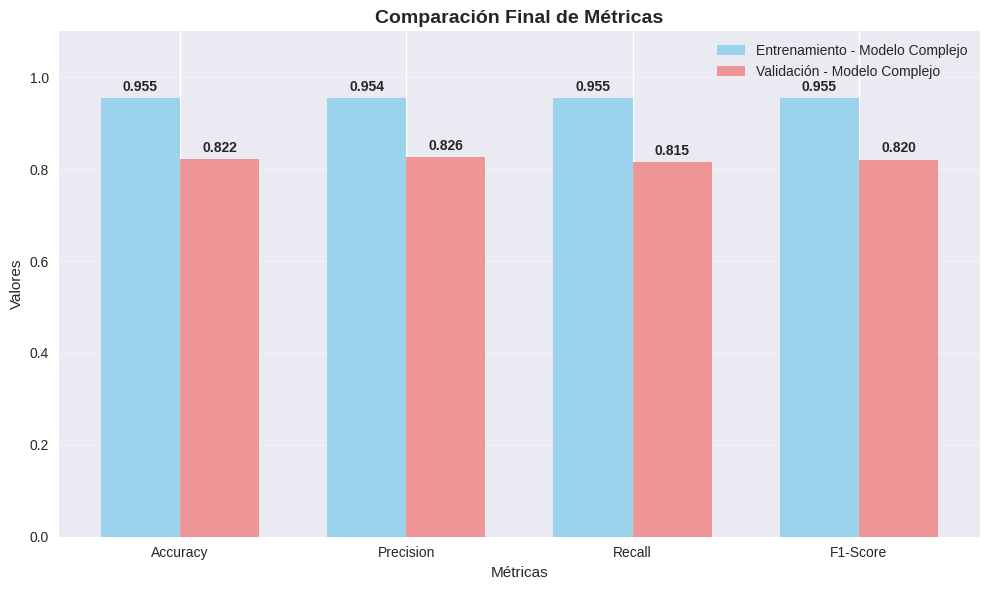

RESUMEN DE ENTRENAMIENTO - MODELO LSTM OPTIMIZADO
Épocas entrenadas: 4
Mejor pérdida de validación: 0.3764
Mejor accuracy de validación: 0.8344
Precision final (validación): 0.8256
Recall final (validación): 0.8153
F1-Score final (validación): 0.8204

ANÁLISIS DE OVERFITTING
Diferencia Loss (train - val): -0.3597
Diferencia Accuracy (train - val): 0.1330
⚠️  POSIBLE OVERFITTING DETECTADO
Recomendaciones:
- Aumentar Dropout
- Reducir épocas
- Aumentar datos de entrenamiento


In [45]:
# Gráfica adicional: Comparación de métricas finales
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))

# Obtener los valores finales
metricas_entrenamiento = [
    historia_base.history['accuracy'][-1],
    historia_base.history['precision'][-1],
    historia_base.history['recall'][-1]
]

metricas_validacion = [
    historia_base.history['val_accuracy'][-1],
    historia_base.history['val_precision'][-1],
    historia_base.history['val_recall'][-1]
]

# Calcular F1-Score
f1_train = 2 * (historia_base.history['precision'][-1] * historia_base.history['recall'][-1]) / (historia_base.history['precision'][-1] + historia_base.history['recall'][-1])
f1_val = 2 * (historia_base.history['val_precision'][-1] * historia_base.history['val_recall'][-1]) / (historia_base.history['val_precision'][-1] + historia_base.history['val_recall'][-1])

metricas_entrenamiento.append(f1_train)
metricas_validacion.append(f1_val)

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.35

bars1 = ax2.bar(x - width/2, metricas_entrenamiento, width, label='Entrenamiento - Modelo Complejo', color='skyblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, metricas_validacion, width, label='Validación - Modelo Complejo', color='lightcoral', alpha=0.8)

# Añadir valores en las barras
def agregar_valores(bars):
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

agregar_valores(bars1)
agregar_valores(bars2)

ax2.set_xlabel('Métricas')
ax2.set_ylabel('Valores')
ax2.set_title('Comparación Final de Métricas', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# Gráfica de Learning Rate (si se usó ReduceLROnPlateau)
if 'lr' in historia_base.history and 'lr' in historia_base.history:
    fig3, ax3 = plt.subplots(1, 1, figsize=(10, 5))
    ax3.plot(historia_base.history['lr'], 'g-', linewidth=2, marker='o', markersize=4)
    ax3.set_title('Evolución del Learning Rate', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Épocas')
    ax3.set_ylabel('Learning Rate')
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Resumen estadístico
print("="*60)
print("RESUMEN DE ENTRENAMIENTO - MODELO LSTM OPTIMIZADO")
print("="*60)
print(f"Épocas entrenadas: {len(historia_base.history['loss'])}")
print(f"Mejor pérdida de validación: {min(historia_base.history['val_loss']):.4f}")
print(f"Mejor accuracy de validación: {max(historia_base.history['val_accuracy']):.4f}")
print(f"Precision final (validación): {historia_base.history['val_precision'][-1]:.4f}")
print(f"Recall final (validación): {historia_base.history['val_recall'][-1]:.4f}")
print(f"F1-Score final (validación): {f1_val:.4f}")

diferencia_loss = historia_base.history['loss'][-1] - historia_base.history['val_loss'][-1]
diferencia_acc = historia_base.history['accuracy'][-1] - historia_base.history['val_accuracy'][-1]

print("\n" + "="*60)
print("ANÁLISIS DE OVERFITTING")
print("="*60)
print(f"Diferencia Loss (train - val): {diferencia_loss:.4f}")
print(f"Diferencia Accuracy (train - val): {diferencia_acc:.4f}")

if abs(diferencia_loss) > 0.1 or abs(diferencia_acc) > 0.05:
    print("⚠️  POSIBLE OVERFITTING DETECTADO")
    print("Recomendaciones:")
    print("- Aumentar Dropout")
    print("- Reducir épocas")
    print("- Aumentar datos de entrenamiento")
else:
    print("✅ MODELO BIEN BALANCEADO")
    print("El modelo generaliza correctamente")

print("="*60)

# Arquitectura compleja

In [21]:
from tensorflow.keras.layers import (Dropout, concatenate, BatchNormalization, Bidirectional)

# Modelo Sequential optimizado con arquitectura más compleja
modelo = Sequential()
modelo.add(Embedding(50000, 256))  # Vocabulario ampliado y embedding más grande
modelo.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))  # LSTM bidireccional
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))  # Segunda capa LSTM
modelo.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))  # Tercera capa LSTM
modelo.add(Dense(64, activation='relu'))  # Primera capa densa
modelo.add(Dropout(0.5))  # Dropout fuerte
modelo.add(Dense(32, activation='relu'))  # Segunda capa densa
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(Dropout(0.4))  # Dropout moderado
modelo.add(Dense(16, activation='relu'))  # Tercera capa densa
modelo.add(Dropout(0.3))  # Dropout ligero
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida

modelo.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', 'precision', 'recall'])

# Callbacks adicionales para mejor entrenamiento
reducir_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.0001,
    verbose=1
)

detencion_temprana = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

historia = modelo.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[detencion_temprana, reducir_lr]
)



Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.5116 - loss: 0.8172 - precision: 0.5129 - recall: 0.3803 - val_accuracy: 0.5004 - val_loss: 0.6944 - val_precision: 0.5002 - val_recall: 0.9994 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.6267 - loss: 0.6419 - precision: 0.6065 - recall: 0.7118 - val_accuracy: 0.7920 - val_loss: 0.4717 - val_precision: 0.8173 - val_recall: 0.7522 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.8180 - loss: 0.4434 - precision: 0.8035 - recall: 0.8445 - val_accuracy: 0.7288 - val_loss: 0.5645 - val_precision: 0.8666 - val_recall: 0.5408 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.8475 - loss: 0.3865 - precision: 0.8403 - recall: 0.8590 - val_accuracy: 0.8023 - val_loss: 0.4710 - val_precision: 0.7571 - val_recall: 0.8902 - learning_rate: 0.0010
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accur

In [30]:
# Después del entrenamiento se puede revisar el historial
print(historia.history.keys())

perdida, exactitud, precision, recall = modelo.evaluate(X_test, y_test,
                                                        batch_size=64,
                                                        verbose=2)
print('Pérdida de la Prueba:', perdida)
print('Exactitud de la Prueba (Test accuracy):', exactitud)

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])
391/391 - 72s - 185ms/step - accuracy: 0.8146 - loss: 0.4185 - precision: 0.7784 - recall: 0.8796
Pérdida de la Prueba: 0.41852015256881714
Exactitud de la Prueba (Test accuracy): 0.8145599961280823


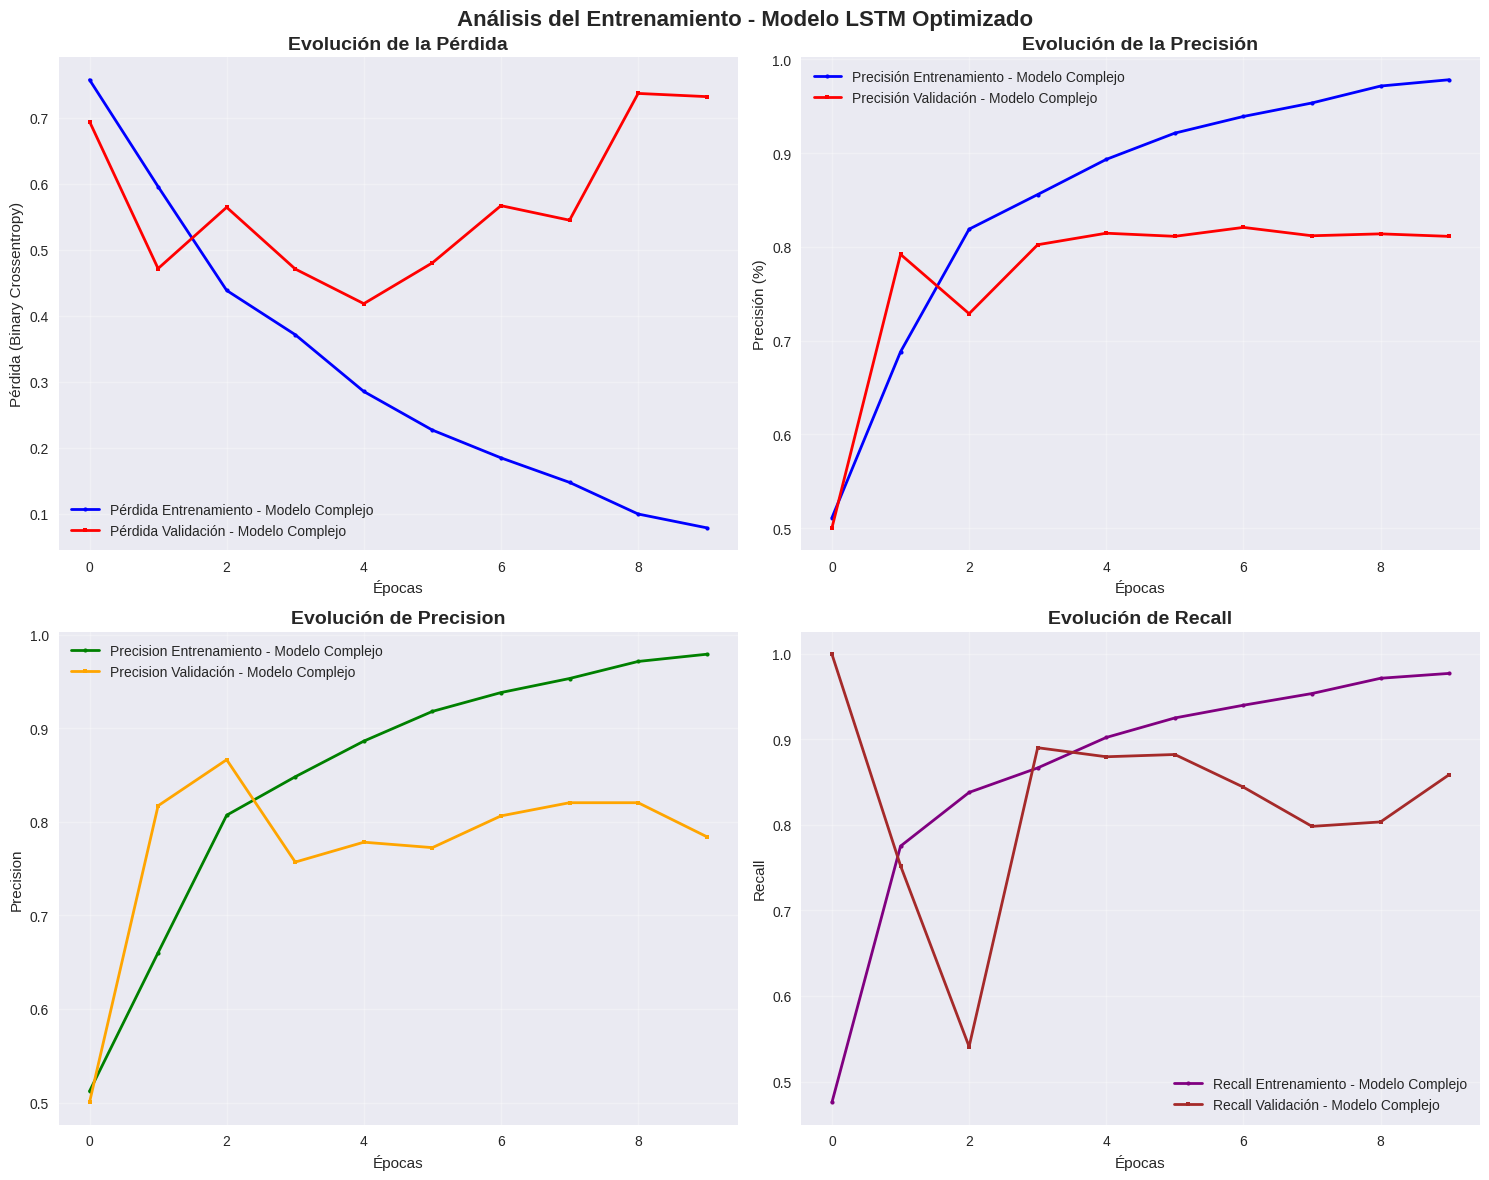

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del Entrenamiento - Modelo LSTM Optimizado', fontsize=16, fontweight='bold')

# 1. Gráfica de Pérdida (Loss)
axes[0, 0].plot(historia.history['loss'], 'b-', linewidth=2, label='Pérdida Entrenamiento - Modelo Complejo', marker='o', markersize=3)
axes[0, 0].plot(historia.history['val_loss'], 'r-', linewidth=2, label='Pérdida Validación - Modelo Complejo', marker='s', markersize=3)
axes[0, 0].set_title('Evolución de la Pérdida', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Épocas')
axes[0, 0].set_ylabel('Pérdida (Binary Crossentropy)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gráfica de Precisión (Accuracy)
axes[0, 1].plot(historia.history['accuracy'], 'b-', linewidth=2, label='Precisión Entrenamiento - Modelo Complejo', marker='o', markersize=3)
axes[0, 1].plot(historia.history['val_accuracy'], 'r-', linewidth=2, label='Precisión Validación - Modelo Complejo', marker='s', markersize=3)
axes[0, 1].set_title('Evolución de la Precisión', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Épocas')
axes[0, 1].set_ylabel('Precisión (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfica de Precision (Métrica)
axes[1, 0].plot(historia.history['precision'], 'g-', linewidth=2, label='Precision Entrenamiento - Modelo Complejo', marker='o', markersize=3)
axes[1, 0].plot(historia.history['val_precision'], 'orange', linewidth=2, label='Precision Validación - Modelo Complejo', marker='s', markersize=3)
axes[1, 0].set_title('Evolución de Precision', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Épocas')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Gráfica de Recall
axes[1, 1].plot(historia.history['recall'], 'purple', linewidth=2, label='Recall Entrenamiento - Modelo Complejo', marker='o', markersize=3)
axes[1, 1].plot(historia.history['val_recall'], 'brown', linewidth=2, label='Recall Validación - Modelo Complejo', marker='s', markersize=3)
axes[1, 1].set_title('Evolución de Recall', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Épocas')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

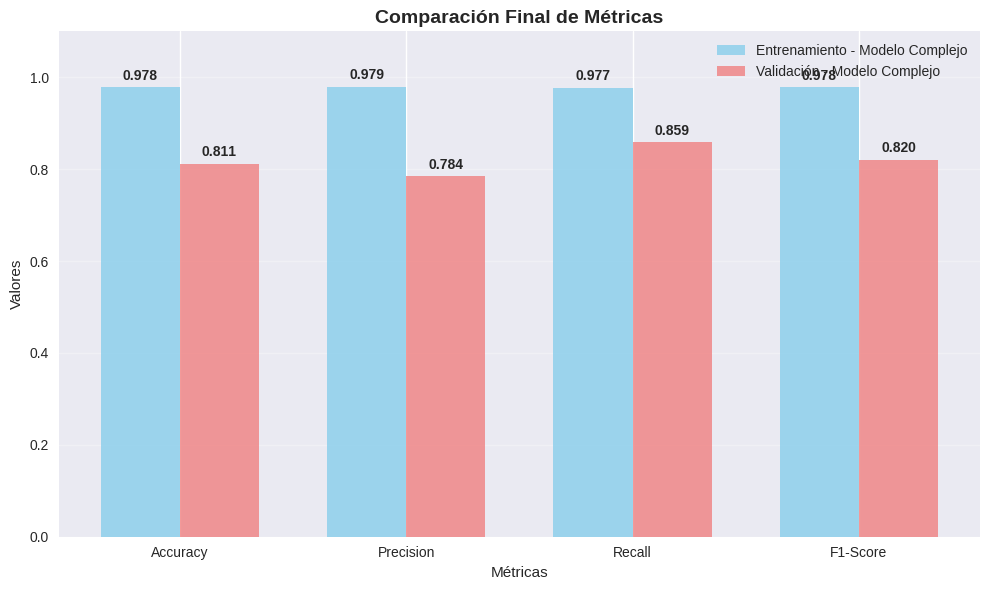

RESUMEN DE ENTRENAMIENTO - MODELO LSTM OPTIMIZADO
Épocas entrenadas: 10
Mejor pérdida de validación: 0.4185
Mejor accuracy de validación: 0.8208
Precision final (validación): 0.7842
Recall final (validación): 0.8586
F1-Score final (validación): 0.8198

ANÁLISIS DE OVERFITTING
Diferencia Loss (train - val): -0.6530
Diferencia Accuracy (train - val): 0.1670
⚠️  POSIBLE OVERFITTING DETECTADO
Recomendaciones:
- Aumentar Dropout
- Reducir épocas
- Aumentar datos de entrenamiento


In [28]:
# Gráfica adicional: Comparación de métricas finales
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))

# Obtener los valores finales
metricas_entrenamiento = [
    historia.history['accuracy'][-1],
    historia.history['precision'][-1],
    historia.history['recall'][-1]
]

metricas_validacion = [
    historia.history['val_accuracy'][-1],
    historia.history['val_precision'][-1],
    historia.history['val_recall'][-1]
]

# Calcular F1-Score
f1_train = 2 * (historia.history['precision'][-1] * historia.history['recall'][-1]) / (historia.history['precision'][-1] + historia.history['recall'][-1])
f1_val = 2 * (historia.history['val_precision'][-1] * historia.history['val_recall'][-1]) / (historia.history['val_precision'][-1] + historia.history['val_recall'][-1])

metricas_entrenamiento.append(f1_train)
metricas_validacion.append(f1_val)

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.35

bars1 = ax2.bar(x - width/2, metricas_entrenamiento, width, label='Entrenamiento - Modelo Complejo', color='skyblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, metricas_validacion, width, label='Validación - Modelo Complejo', color='lightcoral', alpha=0.8)

# Añadir valores en las barras
def agregar_valores(bars):
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

agregar_valores(bars1)
agregar_valores(bars2)

ax2.set_xlabel('Métricas')
ax2.set_ylabel('Valores')
ax2.set_title('Comparación Final de Métricas', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# Gráfica de Learning Rate (si se usó ReduceLROnPlateau)
if 'lr' in historia.history and 'lr' in historia_base.history:
    fig3, ax3 = plt.subplots(1, 1, figsize=(10, 5))
    ax3.plot(historia.history['lr'], 'g-', linewidth=2, marker='o', markersize=4)
    ax3.set_title('Evolución del Learning Rate', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Épocas')
    ax3.set_ylabel('Learning Rate')
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Resumen estadístico
print("="*60)
print("RESUMEN DE ENTRENAMIENTO - MODELO LSTM OPTIMIZADO")
print("="*60)
print(f"Épocas entrenadas: {len(historia.history['loss'])}")
print(f"Mejor pérdida de validación: {min(historia.history['val_loss']):.4f}")
print(f"Mejor accuracy de validación: {max(historia.history['val_accuracy']):.4f}")
print(f"Precision final (validación): {historia.history['val_precision'][-1]:.4f}")
print(f"Recall final (validación): {historia.history['val_recall'][-1]:.4f}")
print(f"F1-Score final (validación): {f1_val:.4f}")

diferencia_loss = historia.history['loss'][-1] - historia.history['val_loss'][-1]
diferencia_acc = historia.history['accuracy'][-1] - historia.history['val_accuracy'][-1]

print("\n" + "="*60)
print("ANÁLISIS DE OVERFITTING")
print("="*60)
print(f"Diferencia Loss (train - val): {diferencia_loss:.4f}")
print(f"Diferencia Accuracy (train - val): {diferencia_acc:.4f}")

if abs(diferencia_loss) > 0.1 or abs(diferencia_acc) > 0.05:
    print("⚠️  POSIBLE OVERFITTING DETECTADO")
    print("Recomendaciones:")
    print("- Aumentar Dropout")
    print("- Reducir épocas")
    print("- Aumentar datos de entrenamiento")
else:
    print("✅ MODELO BIEN BALANCEADO")
    print("El modelo generaliza correctamente")

print("="*60)